# importing the Labraries and dataset loadning..

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#import afinn as Afinn

df=pd.read_csv(r"C:\Users\KARTIKI\Downloads\news_data.csv")
df.head()

,headline,description,date
0,Gaza’s jour­nal­ists: ‘Tar­gets’ or ‘ca­su­al­...,Gaza’s jour­nal­ists are be­ing killed at an u...,23-12-2023
1,Is­rael or­ders ‘death cor­ri­dor’ evac­u­a­ti...,Hun­dreds of Pales­tini­ans were forced to eva...,23-12-2023
2,"Is­rael’s war on Gaza: List of key events, day 78",UN Se­cu­ri­ty Coun­cil pass­es res­o­lu­tion ...,23-12-2023
3,US ac­cus­es Iran of be­ing ‘deeply in­volved’...,White House says Tehran is pro­vid­ing Yemeni ...,23-12-2023
4,Is­raeli forces con­tin­ue at­tacks amid crit­...,The wa­tered-down res­o­lu­tion boost­ing aid ...,23-12-2023


# cleaning and processing

In [8]:
df.shape

(3338, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headline     3338 non-null   object
 1   description  3338 non-null   object
 2   date         3338 non-null   object
dtypes: object(3)
memory usage: 78.4+ KB


In [10]:
df["date"]=pd.to_datetime(df["date"])

C:\Users\KARTIKI\AppData\Local\Temp\ipykernel_10536\1303019909.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["date"]=pd.to_datetime(df["date"])


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3338 entries, 0 to 3337
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   headline     3338 non-null   object        
 1   description  3338 non-null   object        
 2   date         3338 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 78.4+ KB


# checking Null values 

In [12]:
df.isnull().sum()

headline       0
description    0
date           0
dtype: int64

In [13]:
df.head()

,headline,description,date
0,Gaza’s jour­nal­ists: ‘Tar­gets’ or ‘ca­su­al­...,Gaza’s jour­nal­ists are be­ing killed at an u...,2023-12-23
1,Is­rael or­ders ‘death cor­ri­dor’ evac­u­a­ti...,Hun­dreds of Pales­tini­ans were forced to eva...,2023-12-23
2,"Is­rael’s war on Gaza: List of key events, day 78",UN Se­cu­ri­ty Coun­cil pass­es res­o­lu­tion ...,2023-12-23
3,US ac­cus­es Iran of be­ing ‘deeply in­volved’...,White House says Tehran is pro­vid­ing Yemeni ...,2023-12-23
4,Is­raeli forces con­tin­ue at­tacks amid crit­...,The wa­tered-down res­o­lu­tion boost­ing aid ...,2023-12-23


# installing afinn class libraries for sentiments analysis

In [16]:
!pip install afinn



  Using cached afinn-0.1.tar.gz (52 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53437 sha256=a7a988916f08bb2be5556e30aba47da4d02c255db47c576b4f73df7b0ef67585
  Stored in directory: c:\users\kartiki\appdata\local\pip\cache\wheels\ee\d3\a0\f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
Successfully built afinn


In [17]:
import afinn
af=afinn.Afinn()

In [18]:
def senti(x):
    return af.score(x)
df["headline_score"]=df["headline"].apply(senti)
df["description_score"]=df["description"].apply(senti)

# sentiments score of headlines and description

In [19]:
df.head()

,headline,description,date,headline_score,description_score
0,Gaza’s jour­nal­ists: ‘Tar­gets’ or ‘ca­su­al­...,Gaza’s jour­nal­ists are be­ing killed at an u...,2023-12-23,-2.0,-5.0
1,Is­rael or­ders ‘death cor­ri­dor’ evac­u­a­ti...,Hun­dreds of Pales­tini­ans were forced to eva...,2023-12-23,-2.0,-1.0
2,"Is­rael’s war on Gaza: List of key events, day 78",UN Se­cu­ri­ty Coun­cil pass­es res­o­lu­tion ...,2023-12-23,-2.0,1.0
3,US ac­cus­es Iran of be­ing ‘deeply in­volved’...,White House says Tehran is pro­vid­ing Yemeni ...,2023-12-23,0.0,-2.0
4,Is­raeli forces con­tin­ue at­tacks amid crit­...,The wa­tered-down res­o­lu­tion boost­ing aid ...,2023-12-23,0.0,1.0


In [20]:
df["headline_score"].value_counts()

headline_score
 0.0     1389
-2.0      681
-3.0      467
-1.0      232
-4.0      157
-5.0      118
 1.0      112
 2.0       89
-6.0       28
 3.0       26
-7.0       18
-8.0        6
 4.0        6
 5.0        3
-9.0        2
-10.0       2
 8.0        1
-11.0       1
Name: count, dtype: int64

In [21]:
df.head()

,headline,description,date,headline_score,description_score
0,Gaza’s jour­nal­ists: ‘Tar­gets’ or ‘ca­su­al­...,Gaza’s jour­nal­ists are be­ing killed at an u...,2023-12-23,-2.0,-5.0
1,Is­rael or­ders ‘death cor­ri­dor’ evac­u­a­ti...,Hun­dreds of Pales­tini­ans were forced to eva...,2023-12-23,-2.0,-1.0
2,"Is­rael’s war on Gaza: List of key events, day 78",UN Se­cu­ri­ty Coun­cil pass­es res­o­lu­tion ...,2023-12-23,-2.0,1.0
3,US ac­cus­es Iran of be­ing ‘deeply in­volved’...,White House says Tehran is pro­vid­ing Yemeni ...,2023-12-23,0.0,-2.0
4,Is­raeli forces con­tin­ue at­tacks amid crit­...,The wa­tered-down res­o­lu­tion boost­ing aid ...,2023-12-23,0.0,1.0


In [22]:
df.shape

(3338, 5)

In [23]:
df.loc[df["headline_score"]<0].count()

headline             1712
description          1712
date                 1712
headline_score       1712
description_score    1712
dtype: int64

In [24]:
df.loc[df["headline_score"]>0].count()

headline             237
description          237
date                 237
headline_score       237
description_score    237
dtype: int64

In [25]:
df.loc[df["headline_score"]==0].count()

headline             1389
description          1389
date                 1389
headline_score       1389
description_score    1389
dtype: int64

# creating new columns for year, month, day

In [26]:
df["year"]=df["date"].dt.year

In [27]:
df["month"]=df["date"].dt.month_name()

In [28]:
df["day"]=df["date"].dt.day

In [29]:
df.head()

,headline,description,date,headline_score,description_score,year,month,day
0,Gaza’s jour­nal­ists: ‘Tar­gets’ or ‘ca­su­al­...,Gaza’s jour­nal­ists are be­ing killed at an u...,2023-12-23,-2.0,-5.0,2023,December,23
1,Is­rael or­ders ‘death cor­ri­dor’ evac­u­a­ti...,Hun­dreds of Pales­tini­ans were forced to eva...,2023-12-23,-2.0,-1.0,2023,December,23
2,"Is­rael’s war on Gaza: List of key events, day 78",UN Se­cu­ri­ty Coun­cil pass­es res­o­lu­tion ...,2023-12-23,-2.0,1.0,2023,December,23
3,US ac­cus­es Iran of be­ing ‘deeply in­volved’...,White House says Tehran is pro­vid­ing Yemeni ...,2023-12-23,0.0,-2.0,2023,December,23
4,Is­raeli forces con­tin­ue at­tacks amid crit­...,The wa­tered-down res­o­lu­tion boost­ing aid ...,2023-12-23,0.0,1.0,2023,December,23


In [30]:
#Negative News headlines 
neg=df.loc[(df["year"]==2023)&(df["headline_score"]<0)].count()
neg

headline             1288
description          1288
date                 1288
headline_score       1288
description_score    1288
year                 1288
month                1288
day                  1288
dtype: int64

In [31]:
#Positive News headlines 
df.loc[(df["year"]==2023)&(df["headline_score"]==0)].count()

headline             950
description          950
date                 950
headline_score       950
description_score    950
year                 950
month                950
day                  950
dtype: int64

In [32]:
#Neautral News Headlines
df.loc[(df["year"]==2023)&(df["headline_score"]>0)].count()

headline             168
description          168
date                 168
headline_score       168
description_score    168
year                 168
month                168
day                  168
dtype: int64

In [33]:
neg=df.loc[(df["headline_score"]<0)]

# analysing the negative impact headlines and descriptions sentiments

In [34]:
neg

,headline,description,date,headline_score,description_score,year,month,day
0,Gaza’s jour­nal­ists: ‘Tar­gets’ or ‘ca­su­al­...,Gaza’s jour­nal­ists are be­ing killed at an u...,2023-12-23,-2.0,-5.0,2023,December,23
1,Is­rael or­ders ‘death cor­ri­dor’ evac­u­a­ti...,Hun­dreds of Pales­tini­ans were forced to eva...,2023-12-23,-2.0,-1.0,2023,December,23
2,"Is­rael’s war on Gaza: List of key events, day 78",UN Se­cu­ri­ty Coun­cil pass­es res­o­lu­tion ...,2023-12-23,-2.0,1.0,2023,December,23
5,RSF files sec­ond war crimes com­plaint with I...,Lat­est com­plaint by Paris-based press free­d...,2023-12-22,-8.0,-1.0,2023,December,22
10,Is­rael-Gaza war: Why are cul­ture and so­ci­e...,Fa­ti­ma Bhut­to talks with Marc La­m­ont Hill...,2023-12-22,-2.0,0.0,2023,December,22
...,...,...,...,...,...,...,...,...
3328,In Pic­tures: Glob­al protests in sol­i­dar­i­...,Large demon­stra­tions held in chief cities ar...,2021-05-12,-2.0,0.0,2021,May,12
3329,"Jerusalem, the un­fold­ing tragedy","For Ne­tanyahu, Jerusalem and Gaza are the gif...",2021-05-11,-2.0,2.0,2021,May,11
3330,Break the fear bar­ri­er and speak up for Pale...,Say­ing the Pales­tin­ian is­sue is ‘com­plex’...,2021-05-11,-2.0,-6.0,2021,May,11
3332,In Pic­tures: Is­rael at­tacks on Gaza kill 24...,Is­rael con­tin­ues to pound Gaza with air rai...,2021-05-11,-3.0,0.0,2021,May,11


In [35]:
neg.groupby("year").describe(include="object").count

<bound method DataFrame.count of      headline                                                                 \
        count unique                                                top freq   
year                                                                           
2017        1      1                               The War in June 1967    1   
2021      187    186  Is­raeli forces kill Pales­tin­ian man in oc­c...    2   
2022      236    233  Is­raeli forces kill Pales­tin­ian teenag­er i...    4   
2023     1288   1288  Gaza’s jour­nal­ists: ‘Tar­gets’ or ‘ca­su­al­...    1   

     description                                                            \
           count unique                                                top   
year                                                                         
2017           1      1  The June 1967 Arab-Is­raeli war last­ed only s...   
2021         187    187  Al Jazeera talks to young Pales­tini­ans in­ju...   
2022         236

In [36]:
neg.shape

(1712, 8)

# finding the month and year were most news and attack happend

In [37]:
neg.groupby("year").count()

,headline,description,date,headline_score,description_score,month,day
year,,,,,,,
2017,1,1,1,1,1,1,1
2021,187,187,187,187,187,187,187
2022,236,236,236,236,236,236,236
2023,1288,1288,1288,1288,1288,1288,1288


<Axes: xlabel='month'>

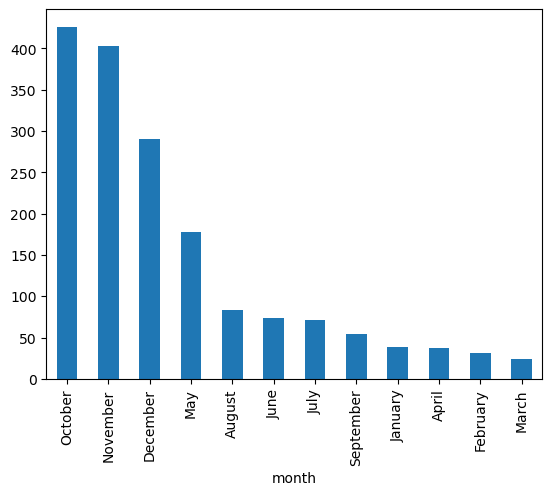

In [38]:
neg["month"].value_counts().plot(kind="bar")


In [46]:
neg.describe()

,date,headline_score,description_score,year,day
count,1712,1712.000000,1712.000000,1712.000000,1712.000000
mean,2023-05-07 23:40:39.252336128,-2.689252,-1.738902,2022.640187,15.303738
min,2017-06-02 00:00:00,-11.000000,-10.000000,2017.000000,1.000000
25%,2023-01-04 00:00:00,-3.000000,-3.000000,2023.000000,8.000000
50%,2023-10-18 00:00:00,-2.000000,-2.000000,2023.000000,15.000000
75%,2023-11-14 00:00:00,-2.000000,0.000000,2023.000000,22.000000
max,2023-12-23 00:00:00,-1.000000,8.000000,2023.000000,31.000000
std,NaN,1.323413,2.070399,0.683082,8.420497


<Axes: xlabel='year'>

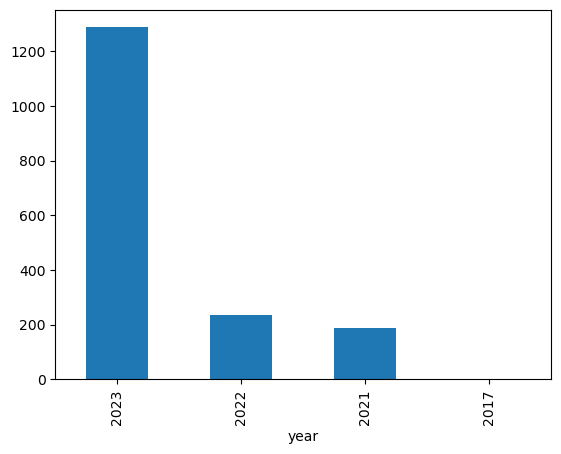

In [43]:
neg["year"].value_counts().plot(kind="bar")

In [40]:
neg.groupby(["month","year"])["day"].describe().reset_index().sort_values(by=["year","count"],ascending=False)

,month,year,count,mean,std,min,25%,50%,75%,max
29,October,2023,401.0,19.558603,6.892908,5.0,13.00,19.0,25.00,31.0
26,November,2023,379.0,13.831135,8.622782,1.0,7.00,13.0,21.00,30.0
7,December,2023,260.0,10.834615,6.356794,1.0,6.00,11.0,16.00,23.0
14,July,2023,40.0,12.500000,8.673567,2.0,4.75,10.0,20.00,28.0
23,May,2023,38.0,12.078947,9.059508,2.0,3.25,10.0,17.75,30.0
11,January,2023,35.0,17.971429,10.279865,2.0,6.00,19.0,27.50,31.0
18,June,2023,31.0,16.741935,6.870069,2.0,13.50,19.0,21.50,29.0
9,February,2023,28.0,17.071429,8.764104,2.0,9.75,20.5,24.00,28.0
4,August,2023,26.0,19.153846,9.640300,1.0,11.00,21.0,28.00,31.0
1,April,2023,20.0,8.950000,6.581273,1.0,6.75,7.0,10.25,28.0


In [42]:
neg.to_csv(r"C:\Users\KARTIKI\Downloads\news_data_update.csv")

In [ ]:
# outcomes: from the dataset we conclude that most of war happend in year 2023 october month
# most of given the negative news sentiments 
# approximately 51.33%. negative news were given during the was based on sentiments analysis so the was was serious.
# thank you 